In [2]:
!pip install git+git://github.com/geopandas/geopandas.git -q

     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 23.2 MB/s 


In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option("max.columns", 30)

print("Available Pandas Datasets", gpd.datasets.available)

Available Pandas Datasets ['naturalearth_lowres', 'naturalearth_cities', 'nybb']


Nauka

In [7]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [8]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-58.66 -34.58)', 'POINT(-47.91 -15.78)',
                     'POINT(-70.66 -33.45)', 'POINT(-74.08 4.60)',
                     'POINT(-66.86 10.48)']})

df

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT(-58.66 -34.58)
1,Brasilia,Brazil,POINT(-47.91 -15.78)
2,Santiago,Chile,POINT(-70.66 -33.45)
3,Bogota,Colombia,POINT(-74.08 4.60)
4,Caracas,Venezuela,POINT(-66.86 10.48)


In [9]:
from shapely import wkt

df['Coordinates'] = gpd.GeoSeries.from_wkt(df['Coordinates'])
df

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,POINT (-47.91000 -15.78000)
2,Santiago,Chile,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,POINT (-66.86000 10.48000)


In [10]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,POINT (-47.91000 -15.78000)
2,Santiago,Chile,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,POINT (-66.86000 10.48000)


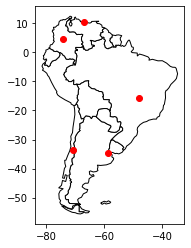

In [11]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

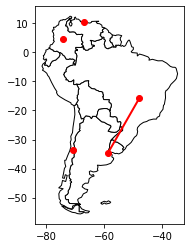

In [70]:
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.plot([df.iloc[0]["Coordinates"].x , df.iloc[1]["Coordinates"].x], 
         [df.iloc[0]["Coordinates"].y , df.iloc[1]["Coordinates"].y], 
         linewidth=2, color="red", alpha=1)

plt.show()

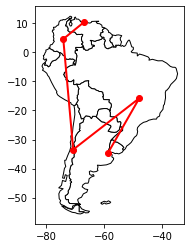

In [26]:
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

#wszytkie x w jednej liście i wszystkei y w drugiej liście
plt.plot([df.iloc[0]["Coordinates"].x , df.iloc[1]["Coordinates"].x , df.iloc[2]["Coordinates"].x , df.iloc[3]["Coordinates"].x , df.iloc[4]["Coordinates"].x],
         [df.iloc[0]["Coordinates"].y , df.iloc[1]["Coordinates"].y , df.iloc[2]["Coordinates"].y , df.iloc[3]["Coordinates"].y , df.iloc[4]["Coordinates"].y],
         linewidth=2, color="red", alpha=1)

plt.show()

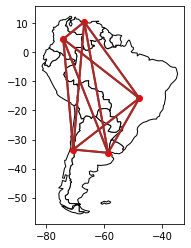

In [67]:
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

#wszytkie x w jednej liście i wszystkei y w drugiej liście
for j in range(len(df))[:]:
  v_color = "brown"

  # if j == 0:
  #   v_color = "green"
  # elif j == 1:
  #   v_color = "red"
  # elif j == 2:
  #   v_color = "blue"
  # elif j == 3:
  #   v_color = "orange"
  # else:
  #   v_color = "brown"
  
  
  for i in range(len(df)):
    plt.plot([df.iloc[j]["Coordinates"].x , df.iloc[i]["Coordinates"].x ],
            [df.iloc[j]["Coordinates"].y , df.iloc[i]["Coordinates"].y ],
            linewidth=2, color=v_color, alpha=1)

plt.show()